In [1]:

%load_ext autoreload
%autoreload 2

In [2]:
from everywhereml.data import ImageDataset
from everywhereml.data.collect import MjpegCollector
from skimage.io import imread
import cv2
import  os
import time
from everywhereml.data import ImageDataset
from everywhereml.data.collect import MjpegCollector

c:\Users\tranv\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# video huong dan
from logging import basicConfig, INFO
from IPython.display import IFrame
basicConfig(level=INFO)
# IFrame('https://www.youtube.com/embed/ZxRnVBiN_y4?rel=0', width=694, height=390)

In [4]:
base_folder = 'dataset_folder3'

try:
    # if our dataset folder already exists, load it
    image_dataset = ImageDataset.from_nested_folders(
        name='Boards', 
        base_folder=base_folder
    )
except FileNotFoundError:
    # if the dataset folder does not exists, collect the samples
    # from the Esp32-cam web server
    # duration is how long (in seconds) the program will collect 
    # the images for each class
    mjpeg_collector = MjpegCollector(address='http://192.168.0.114:81/stream')
    image_dataset = mjpeg_collector.collect_many_classes(
        dataset_name='Boards', 
        base_folder=base_folder,
        duration = 5
    )
  
print(image_dataset)

This is an interactive data capturing procedure.
Keep in mind that when you enter a class name, the capturing will start in 2 seconds, so be ready!


102.84728050231932it [00:05, 20.01it/s]                         
INFO:root:Captured 16 images
INFO:root:creating c:\Users\tranv\OneDrive\Documents\Visual Studio 2022\MCU\dataset_folder3 folder
INFO:root:creating c:\Users\tranv\OneDrive\Documents\Visual Studio 2022\MCU\dataset_folder3\background folder
 98%|█████████▊| 98.14641952514648/100 [00:04<00:00, 20.00it/s] c:\Users\tranv\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\std.py:639: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 100.24024963378906/100 [00:05<00:00, 19.99it/s]
INFO:root:Captured 46 images
INFO:root:creating c:\Users\tranv\OneDrive\Documents\Visual Studio 2022\MCU\dataset_folder3\viet folder
101.6400384902954it [00:05, 20.00it/s]                          
INFO:root:Captured 49 images
INFO:root:creating c:\Users\tranv\OneDrive\Documents\Visual Studio 2022\MCU\dataset_folder3\phuoc folder


ImageDataset[Boards](num_images=111, num_labels=3, labels=['background', 'phuoc', 'viet'])


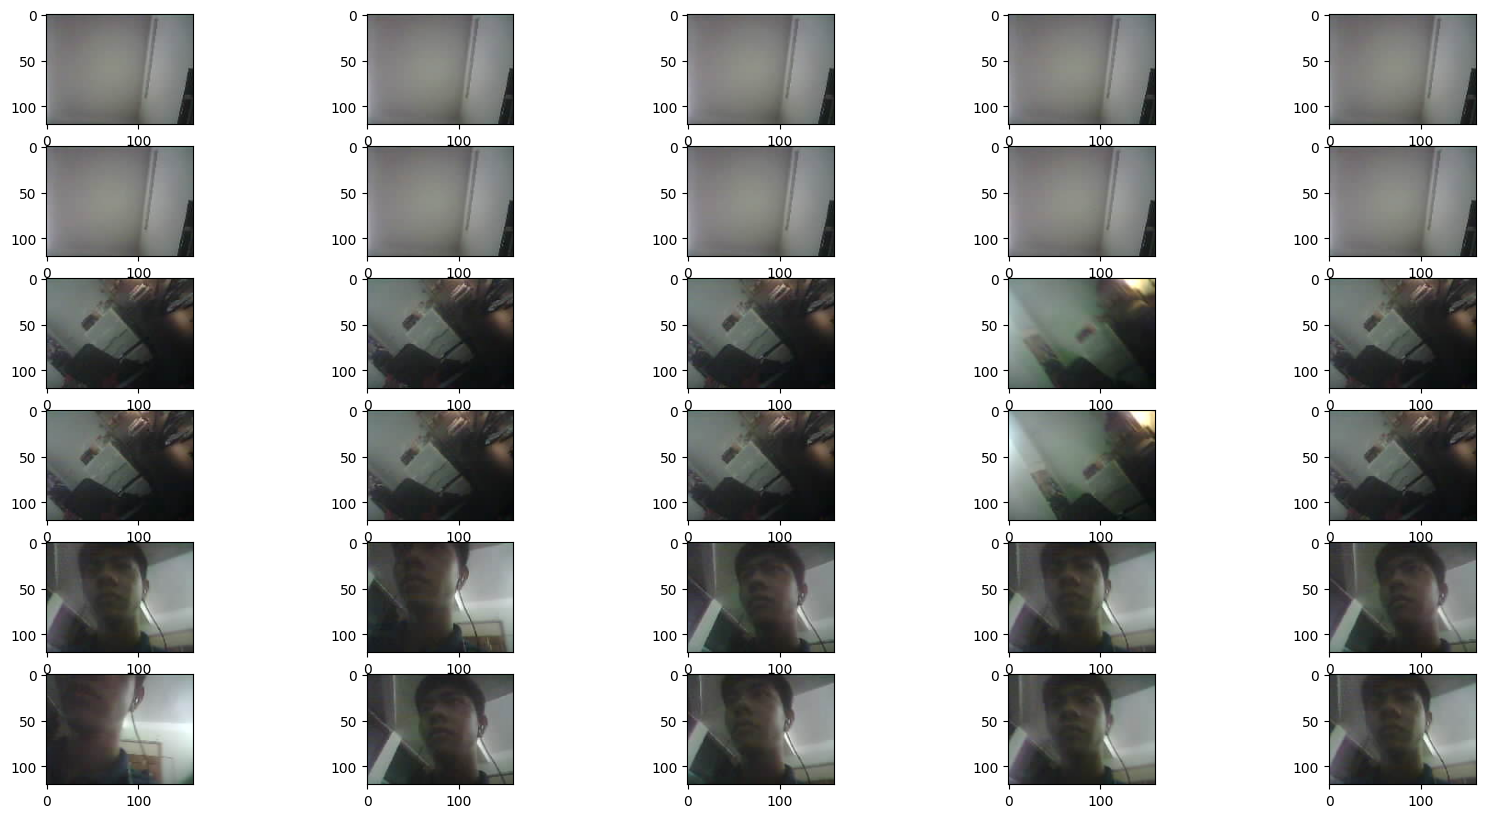

In [5]:
"""
Display a preview of the captured images
"""
image_dataset.preview(
    samples_per_class=10,
    rows_per_class=2,
    figsize=(20, 10)
)

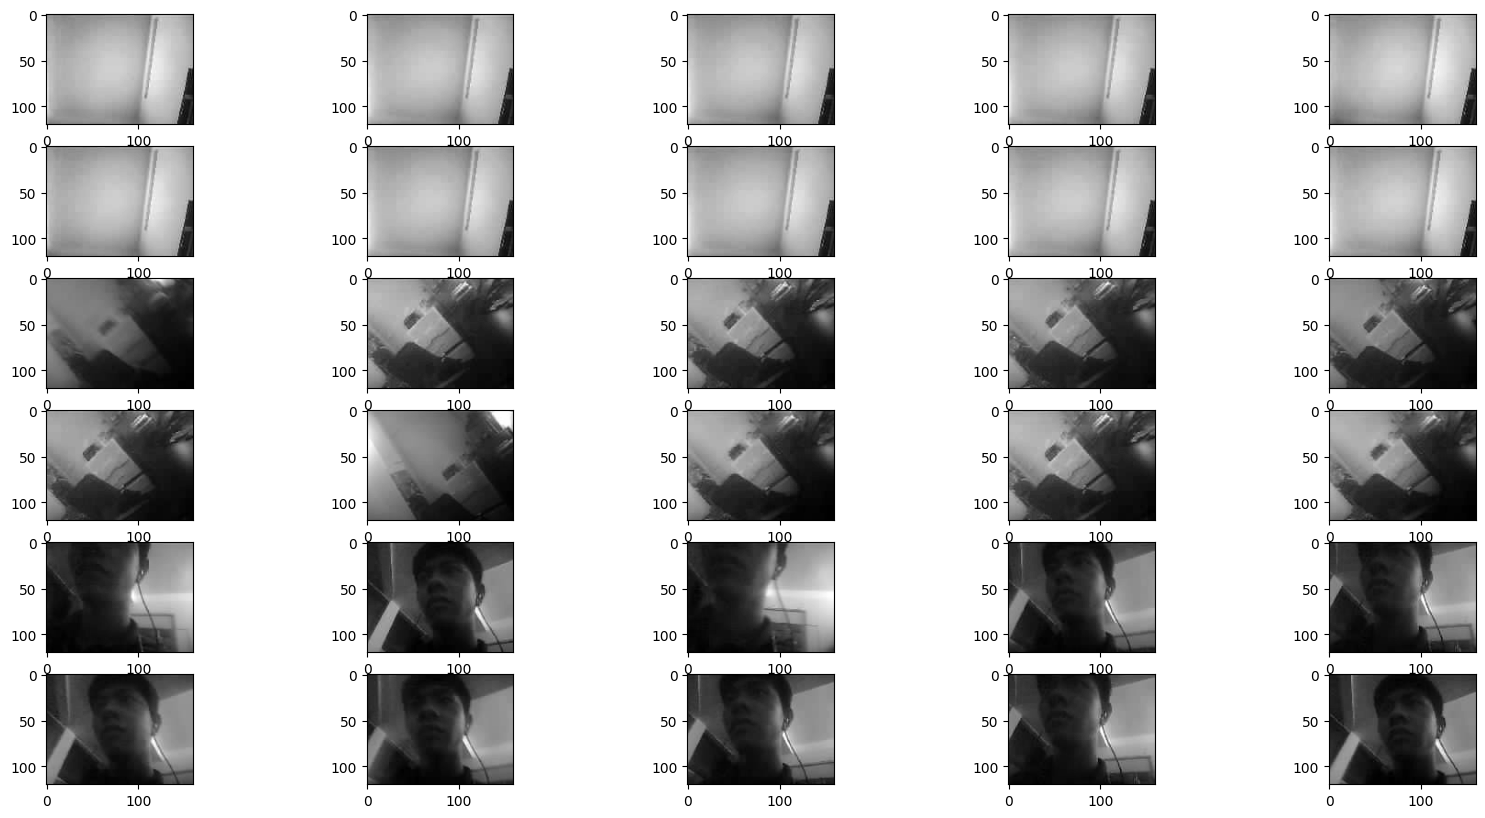

In [6]:
"""
Image classification with HOG works on grayscale images at the moment
So convert images to grayscale in the range 0-255
"""
image_dataset = image_dataset.gray().uint8()
"""
Preview grayscale images
"""
image_dataset.preview(
    samples_per_class=10,
    rows_per_class=2,
    figsize=(20, 10),
    cmap='gray'
)

In [7]:
"""
Create an image recognition pipeline with HOG feature extractor
"""
from everywhereml.preprocessing.image.object_detection import HogPipeline
from everywhereml.preprocessing.image.transform import Resize

pipeline = HogPipeline(
    transforms=[
        Resize(width=40, height=30)
    ]
)
    
# Convert images to feature vectors
feature_dataset = pipeline.fit_transform(image_dataset)
feature_dataset.describe()

HOG: 100%|██████████| 111/111 [00:00<00:00, 674.59it/s]


,hog0,hog1,hog2,hog3,hog4,hog5,hog6,hog7,hog8,hog9,...,hog126,hog127,hog128,hog129,hog130,hog131,hog132,hog133,hog134,target
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.268189,0.028942,0.011591,0.021728,0.157200,0.166473,0.163815,0.160251,0.211733,0.028143,...,0.003672,0.037633,0.050588,0.159543,0.211280,0.071941,0.044855,0.076784,0.178896,1.270270
std,0.435255,0.067294,0.028813,0.032960,0.150473,0.145498,0.185329,0.190197,0.272213,0.056559,...,0.014130,0.113869,0.101353,0.179917,0.276722,0.058561,0.042777,0.104082,0.343909,0.699947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.006355,0.014667,0.028685,0.048938,0.019752,0.000000,...,0.000000,0.000000,0.000000,0.019288,0.049678,0.019312,0.000000,0.012237,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.007568,0.122206,0.125914,0.091984,0.106557,0.084099,0.000000,...,0.000000,0.000000,0.000000,0.086854,0.131444,0.069942,0.041579,0.039457,0.025411,1.000000
75%,0.851186,0.019116,0.013048,0.030377,0.272017,0.286938,0.214374,0.187721,0.312084,0.025125,...,0.000000,0.003079,0.042138,0.222759,0.202621,0.108767,0.075104,0.079396,0.115473,2.000000
max,1.000000,0.375341,0.209023,0.202012,0.550397,0.496351,0.740196,1.000000,1.000000,0.311318,...,0.087243,0.638640,0.578797,0.667010,1.000000,0.232921,0.159832,0.505677,1.000000,2.000000


In [8]:
"""
Print pipeline description
"""
print(pipeline)

ImagePipeline: HogPipeline
---------
 - Resize(from=(160, 120), to=(40, 30), pixformat=gray)
 > HOG(block_size=8, bins=9, cell_size=3)


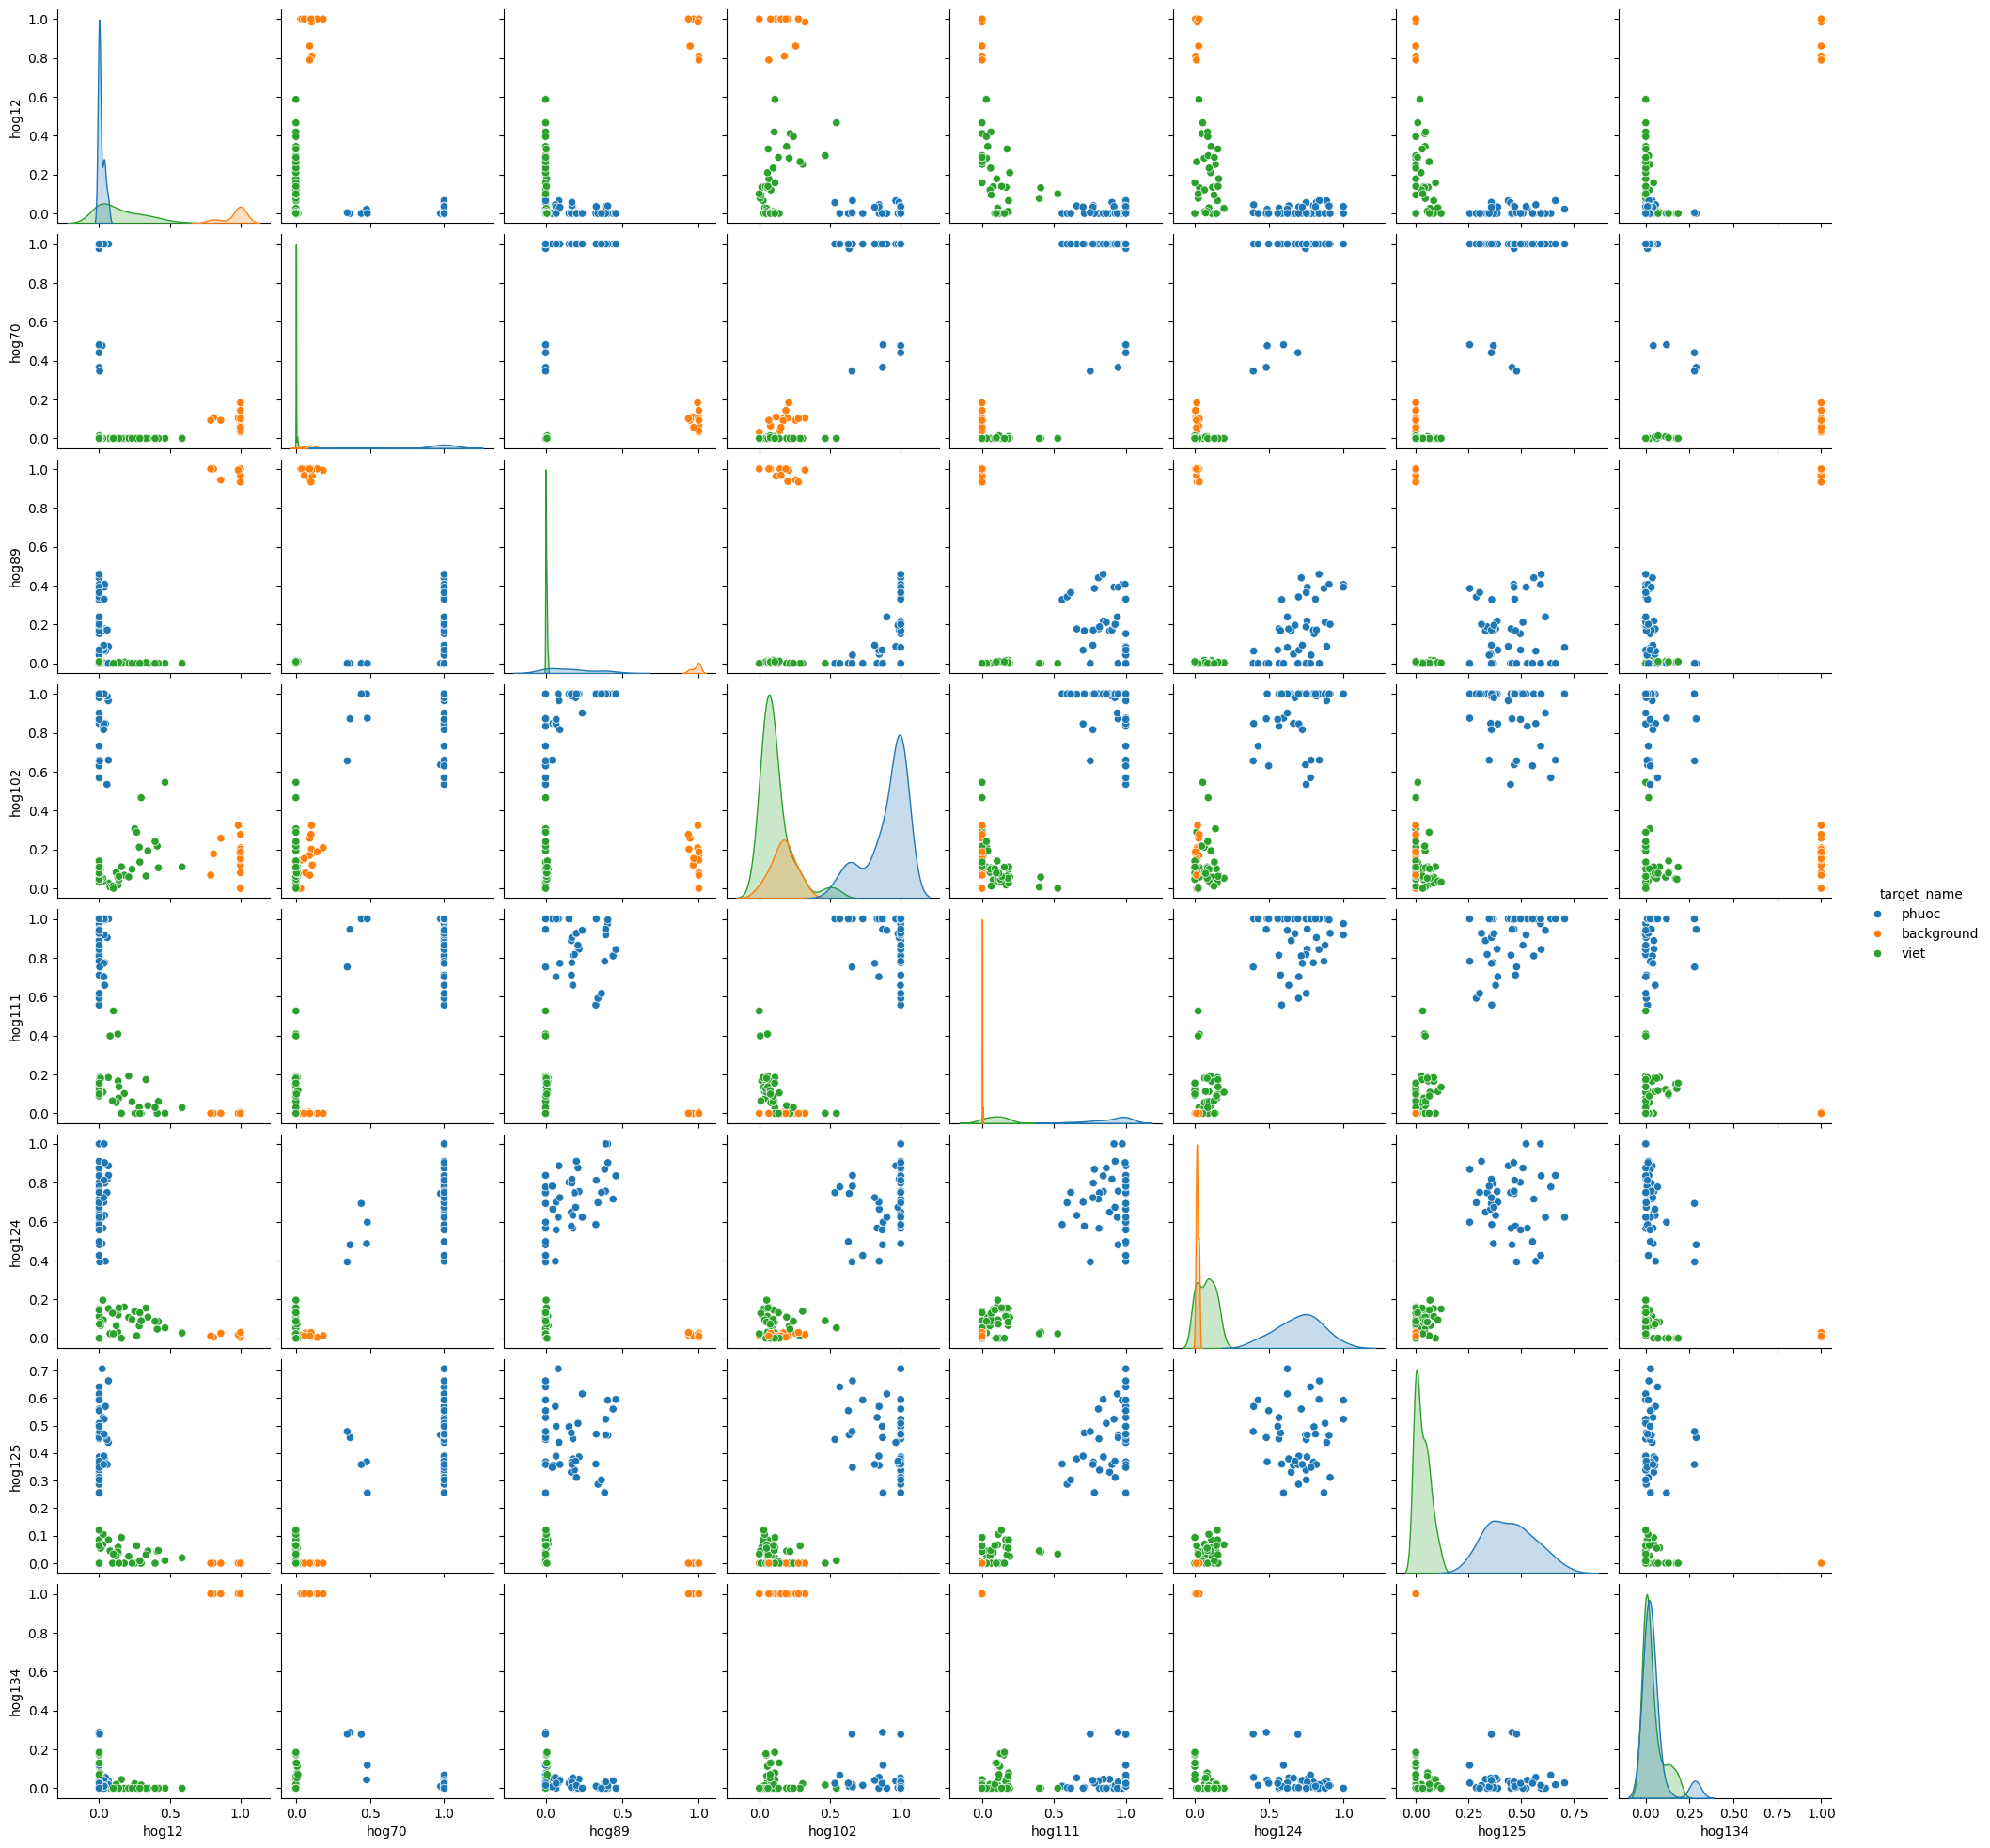

In [10]:
"""
Plot pairplot of features.
Feel free to open the image in a new window to see it at full scale.
In the next line:
 - n is the number of points to plot (the greater the value, the longer it takes)
 - k is the number of features (values greater than 10 become messy)
"""
feature_dataset.plot.features_pairplot(n=100, k=8)

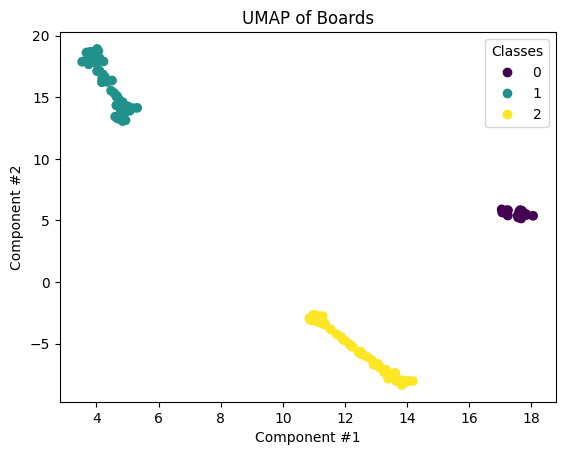

In [11]:
"""
bieu do phan cum cua tap du lieu : lieu du lieu co the su dung de phan loai duoc hay khong
cac tap du lieu khong mang tinh phan loai ro rang khong the dung de phan loai du lieu 
"""
feature_dataset.plot.umap()

In [12]:
"""
Create and fit RandomForest classifier
"""
from everywhereml.sklearn.ensemble import RandomForestClassifier

for i in range(10):
    clf = RandomForestClassifier(n_estimators=5, max_depth=10)

    # fit on train split and get accuracy on the test split
    train, test = feature_dataset.split(test_size=0.4, random_state=i)
    clf.fit(train)

    print('Score on test set: %.2f' % clf.score(test))

# now fit on the whole dataset
clf.fit(feature_dataset)

Score on test set: 0.98
Score on test set: 1.00
Score on test set: 1.00
Score on test set: 0.96
Score on test set: 1.00
Score on test set: 1.00
Score on test set: 1.00
Score on test set: 1.00
Score on test set: 1.00
Score on test set: 1.00


RandomForestClassifier(base_estimator=deprecated, bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight=None, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha'), max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None, num_outputs=3, oob_score=False, package_name=everywhereml.sklearn.ensemble, random_state=None, template_folder=everywhereml/sklearn/ensemble, verbose=0, warm_start=False)

In [14]:
"""
Export pipeline to C++
Replace the path to your actual sketch path
"""
print(pipeline.to_arduino_file(
    filename='path-to-sketch/HogPipeline.h',
    instance_name='hog'
))

#ifndef UUID2162202445520
#define UUID2162202445520


    #ifndef UUID2162212745104
#define UUID2162212745104

/**
  * HOG(block_size=8, bins=9, cell_size=3)
 */
class HOG {
    public:

        /**
         * Transform input image
         */
         template<typename T, typename U>
        bool transform(T *input, U *output) {
            
    uint16_t f = 0;
    uint16_t block = 0;
    float hog[135] = {0};

    // compute gradients
    for (uint16_t blockY = 0; blockY < 3; blockY++) {
        const uint16_t blockOffsetY = blockY * 320;

        for (uint16_t blockX = 0; blockX < 5; blockX++) {
            const uint16_t blockOffsetX = blockX * 8;
            float hist[9] = {0};

            for (uint16_t _y = 1; _y < 7; _y += 1) {
                const uint16_t rowOffset = blockOffsetY + _y * 40 + blockOffsetX;
                const uint16_t rowOffsetBefore = rowOffset - 40;
                const uint16_t rowOffsetAfter = rowOffset + 40;

                for (uint16_t _x = 1; _x 

In [15]:
"""
Export classifier to C++
Replace the path to your actual sketch path

The class_map parameters convert numeric classes to human-readable strings
"""
print(clf.to_arduino_file(
    filename='path-to-sketch/HogClassifier.h',
    instance_name='classifier',
    class_map=feature_dataset.class_map
))

#ifndef UUID2162286549712
#define UUID2162286549712

/**
  * RandomForestClassifier(base_estimator=deprecated, bootstrap=True, ccp_alpha=0.0, class_name=RandomForestClassifier, class_weight=None, criterion=gini, estimator=DecisionTreeClassifier(), estimator_params=('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha'), max_depth=10, max_features=sqrt, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None, num_outputs=3, oob_score=False, package_name=everywhereml.sklearn.ensemble, random_state=None, template_folder=everywhereml/sklearn/ensemble, verbose=0, warm_start=False)
 */
class RandomForestClassifier {
    public:

        /**
         * Predict class from features
         */
        int predict(float *x) {
            int predictedValue = 0;
 

In [ ]:
"""
Play demo video
"""
from IPython.display import Video

Video("assets/esp32 image object classification live demo.mp4", width=728)